<a href="https://colab.research.google.com/github/sidharrth2002/gesture-detection-vgg16/blob/main/Gesture_Detection_with_Transfer_Learning_(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog'

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import cv2
import os
from PIL import Image

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0

for i in os.listdir(path + '/00'):
  if not i.startswith('.'):
    lookup[i] = count
    reverselookup[count] = i
    count = count + 1

lookup
reverselookup

{0: '01_palm',
 1: '02_l',
 2: '03_fist',
 3: '04_fist_moved',
 4: '05_thumb',
 5: '06_index',
 6: '07_ok',
 7: '08_palm_moved',
 8: '09_c',
 9: '10_down'}

In [ ]:
x_data = [] 
y_data = []
numImages = 0
 
newpath = path[:]
print(newpath)
 
for i in range(5):
  for j in os.listdir(path + '/0' + str(i) + '/'):
    if not j.startswith('.'):
      countOfGesture = 0
      for k in os.listdir(path + '/0' + str(i) + '/' + j + '/'):
        newpath = path + '/0' + str(i) + '/' + j + '/' + k 
        img = cv2.imread(newpath, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (150, 150))
        arr = np.array(img)
        # arr = arr/255
        x_data.append(arr)
        print(numImages, countOfGesture)
        countOfGesture += 1
      y_values = np.full((countOfGesture, 1), lookup[j])
      y_data.append(y_values)
      numImages += countOfGesture

Streaming output truncated to the last 5000 lines.
5000 0
5000 1
5000 2
5000 3
5000 4
5000 5
5000 6
5000 7
5000 8
5000 9
5000 10
5000 11
5000 12
5000 13
5000 14
5000 15
5000 16
5000 17
5000 18
5000 19
5000 20
5000 21
5000 22
5000 23
5000 24
5000 25
5000 26
5000 27
5000 28
5000 29
5000 30
5000 31
5000 32
5000 33
5000 34
5000 35
5000 36
5000 37
5000 38
5000 39
5000 40
5000 41
5000 42
5000 43
5000 44
5000 45
5000 46
5000 47
5000 48
5000 49
5000 50
5000 51
5000 52
5000 53
5000 54
5000 55
5000 56
5000 57
5000 58
5000 59
5000 60
5000 61
5000 62
5000 63
5000 64
5000 65
5000 66
5000 67
5000 68
5000 69
5000 70
5000 71
5000 72
5000 73
5000 74
5000 75
5000 76
5000 77
5000 78
5000 79
5000 80
5000 81
5000 82
5000 83
5000 84
5000 85
5000 86
5000 87
5000 88
5000 89
5000 90
5000 91
5000 92
5000 93
5000 94
5000 95
5000 96
5000 97
5000 98
5000 99
5000 100
5000 101
5000 102
5000 103
5000 104
5000 105
5000 106
5000 107
5000 108
5000 109
5000 110
5000 111
5000 112
5000 113
5000 114
5000 115
5000 116
5000 1

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
y_data = y_data.reshape(numImages, 1)

In [ ]:
x_data_cut = x_data[:13800]
x_data_cut.shape

(10000, 150, 150)

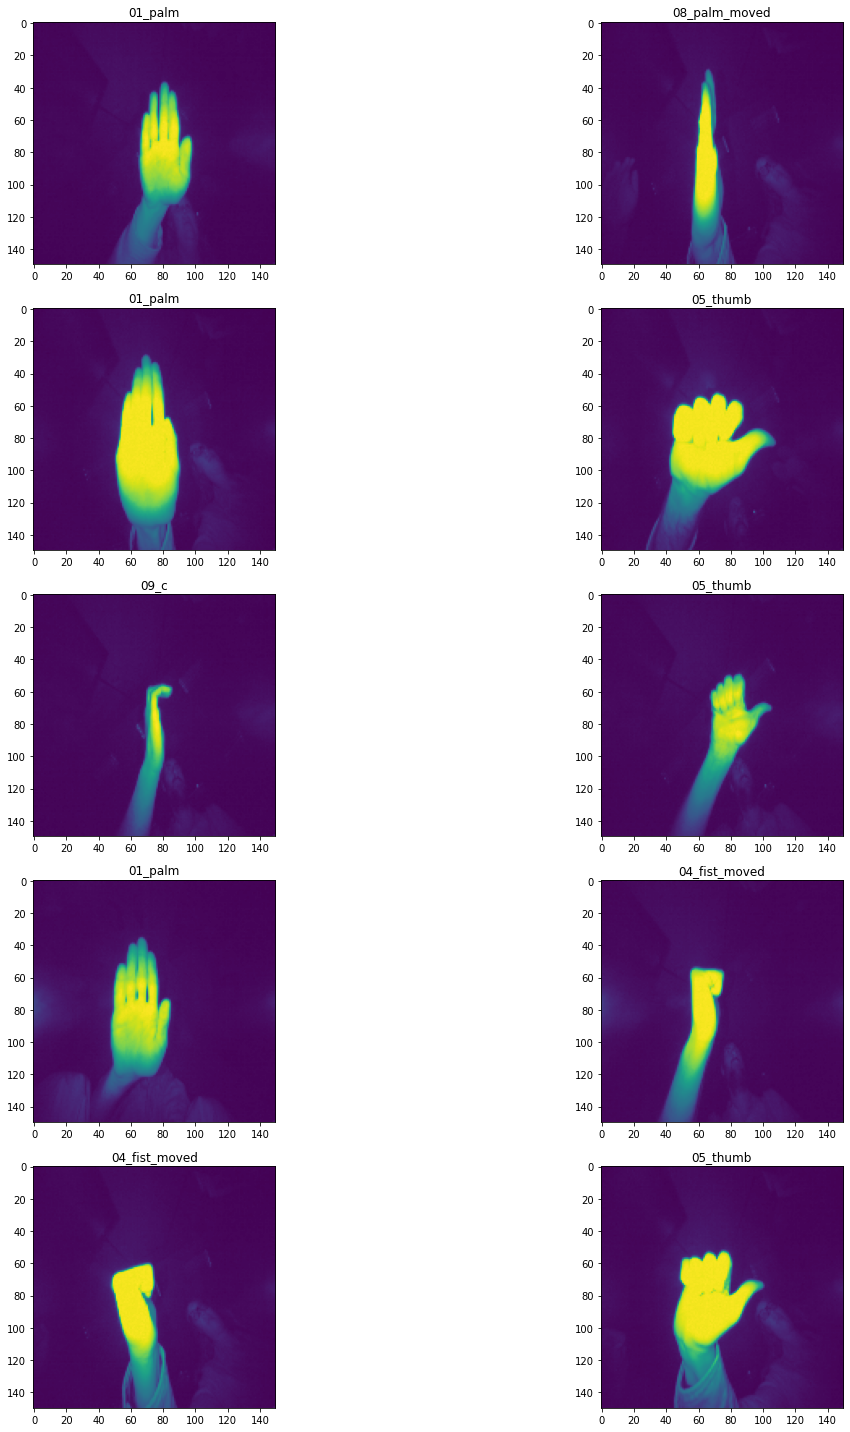

In [ ]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(5,2)
fig.set_size_inches(20,20)

for i in range(5):
  for j in range(2):
    l = random.randint(0, len(y_data))
    ax[i, j].imshow(x_data_cut[l])
    ax[i,j].set_title(reverselookup[y_data[l,0]])

plt.tight_layout()

In [ ]:
x_data[0].shape

(150, 150)

In [ ]:
from keras.utils import to_categorical

y_data = to_categorical(y_data)

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=(150,150,3))

In [ ]:
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD

for layer in conv_base.layers:
  layer.trainable = False

top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(10, activation='softmax')(top_model)

model = Model(inputs=conv_base.input, outputs=output_layer)

model.compile(optimizer=SGD(lr=1e-4, momentum=0.9), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

plot_loss_1 = PlotLossesCallback()

tl_checkpoint_1 = ModelCheckpoint(filepath=path + '/trained-models/with-all-data',
                                  save_best_only=True,
                                  verbose=1,
                                  monitor='val_loss')
# early_stop = EarlyStopping(monitor='val_loss',
#                            patience=10,
#                            restore_best_weights=True,
#                            mode='min')

In [ ]:
#increase dimensions
x_data_cut = np.array(x_data_cut, dtype = 'float32')
x_data_cut = np.stack((x_data_cut,) * 3, axis=-1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data_cut, y_data, test_size=0.2, random_state=33)

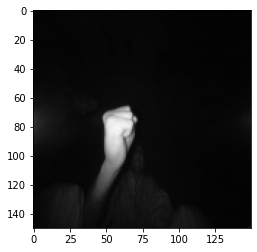

In [ ]:
plt.imshow(X_train[11]/255)

In [ ]:
model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=300, epochs=50, callbacks=[tl_checkpoint_1])

Epoch 1/50
22/22 [==============================] - 103s 2s/step - loss: 4.2937 - accuracy: 0.4913 - val_loss: 0.0080 - val_accuracy: 0.9975

Epoch 00001: val_loss improved from inf to 0.00797, saving model to /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models/with-all-data
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models/with-all-data/assets
Epoch 2/50
22/22 [==============================] - 28s 1s/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.0023 - val_accuracy: 0.9987

Epoch 00002: val_loss improved from 0.00797 to 0.00232, saving model to /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models/with-all-data
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models/with-all-data/assets
Epoch 3/50
22/22 [==============================] - 28s 1s/step - loss: 0.0064 - accuracy: 0.9984 - v

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
 
vgg_acc = accuracy_score(np.argmax(Y_test, axis=1), y_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 100.00%


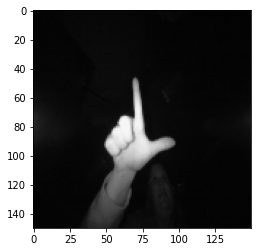

In [ ]:
plt.imshow(X_test[251]/255)

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
np.argmax(y_pred[251])

1

In [ ]:
np.argmax(Y_test[103])

4

In [ ]:
model.save(path + '/trained-models/with-all-data/vggmodified.h5')

I have no idea how the accuracy is this high, but it checks out for some images I manually tested. I trained with 1/10th of the available data due to the lack of computational power.

In [ ]:
# !kaggle datasets download -d keras/vgg16

In [ ]:
# !unzip '/content/vgg16.zip'

In [ ]:
# !cp -r '/content/vgg16' '/content/drive/MyDrive/Deep Learning/Gesture Detection'

In [ ]:
# !cp -r '/content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog' '/content'

In [ ]:
X_train.shape

(8000, 150, 150, 3)

In [ ]:
X_train.shape